# Regresión lineal multiple


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# regresion lineal con statmodels
import statsmodels.api as sm
import seaborn as sns

url_data = "https://raw.githubusercontent.com/jealcalat/AEM-ITESO/main/datasets/wages.csv"

# earn: salario
# height: estatura
# ed: escolaridad
# tenure: antiguedad (no se encuentra)
# age: edad
# sex: sexo
datos = pd.read_csv(url_data)
datos.describe()

,earn,height,ed,age
count,1379.000000,1379.000000,1379.000000,1379.000000
mean,32446.292622,66.592640,13.354605,45.328499
std,31257.070006,3.818108,2.438741,15.789715
min,-98.580489,57.340000,3.000000,22.000000
25%,10538.790721,63.720000,12.000000,33.000000
50%,26877.870178,66.050000,13.000000,42.000000
75%,44506.215336,69.315000,15.000000,55.000000
max,317949.127955,77.210000,18.000000,95.000000


In [2]:
datos.columns

Index(['earn', 'height', 'sex', 'race', 'ed', 'age'], dtype='object')

In [3]:
datos['sex'].value_counts()

sex
female    859
male      520
Name: count, dtype: int64

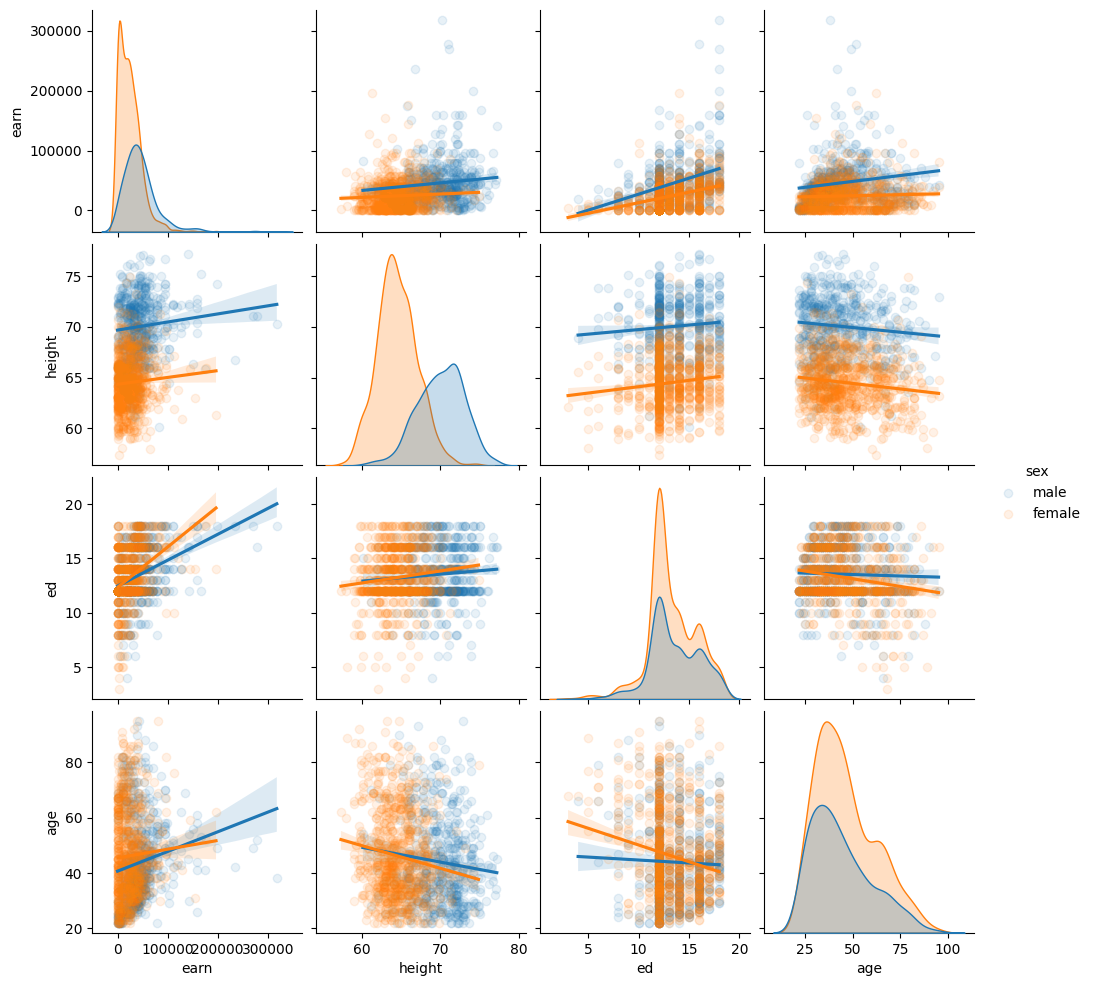

In [4]:
sns.pairplot(
    datos,
    hue='sex',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.1}}
)

In [5]:
# earn ~ ed
model1 = sm.OLS.from_formula("earn ~ ed", data=datos)
result = model1.fit()

In [6]:
result.summary() # r2 = 1 - RSS/TSS, RSS: variabilidad debida al modelo, TSS: variabilidad total

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     192.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           4.19e-41
Time:                        18:35:09   Log-Likelihood:                -16139.
No. Observations:                1379   AIC:                         3.228e+04
Df Residuals:                    1377   BIC:                         3.229e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.753e+04   4391.609     -6.268      0.000   -3.61e+04   -1.89e+04
ed          4490.6976    323.500     13.882      0.000    3856.091    5125.304
==============================================================================
Omnibus:                      820.405   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11524.806
Skew:                           2.503   Prob(JB):                         0.00
Kurtosis:                      16.249   Cond. No.                         76.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

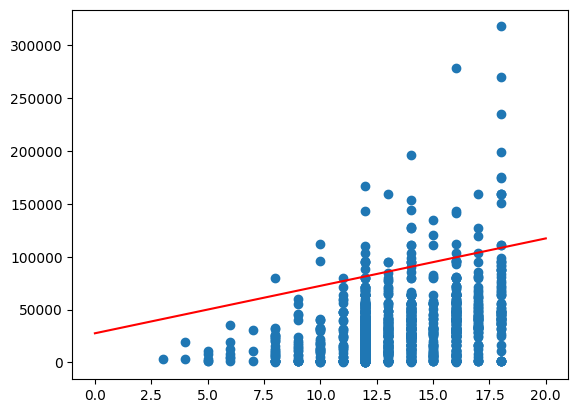

In [7]:
ed = np.linspace(0, 20, 100).reshape(-1,1)
earn_hat = 2.753e+04 + 4490.6976 * ed
plt.scatter(
    datos['ed'],
    datos['earn']
);
plt.plot(ed, earn_hat, color='red')

In [8]:
# earn ~ ed + age
model2 = sm.OLS.from_formula("earn ~ ed + age", data=datos)

In [9]:
result2 = model2.fit()
result2.summary() # r2 de modelo1 0.123

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     109.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           7.54e-45
Time:                        18:35:09   Log-Likelihood:                -16127.
No. Observations:                1379   AIC:                         3.226e+04
Df Residuals:                    1376   BIC:                         3.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.113e+04   5193.558     -7.920      0.000   -5.13e+04   -3.09e+04
ed          4692.8821    323.666     14.499      0.000    4057.949    5327.815
age          240.5793     49.991      4.812      0.000     142.513     338.645
==============================================================================
Omnibus:                      821.860   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11847.080
Skew:                           2.499   Prob(JB):                         0.00
Kurtosis:                      16.462   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(
        f'R2 modelo2/R2 modelo1 {0.137/0.123}'
)

R2 modelo2/R2 modelo1 1.1138211382113823


In [11]:
# earn ~ ed + age + sex
model3 = sm.OLS.from_formula("earn ~ ed + age + sex", data=datos)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     146.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.63e-82
Time:                        18:35:09   Log-Likelihood:                -16037.
No. Observations:                1379   AIC:                         3.208e+04
Df Residuals:                    1375   BIC:                         3.210e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.791e+04   4892.707     -9.792      0.000   -5.75e+04   -3.83e+04
sex[T.male]    2.1e+04   1519.006     13.825      0.000     1.8e+04     2.4e+04
ed           4469.2720    303.814     14.711      0.000    3873.283    5065.261
age           281.2589     46.950      5.991      0.000     189.157     373.361
==============================================================================
Omnibus:                      837.047   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13480.040
Skew:                           2.520   Prob(JB):                         0.00
Kurtosis:                      17.464   Cond. No.                         332.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print(
    f'R2 modelo3/R2 modelo1 {0.243/0.123}\n',
    f'R2 modelo3/R2 modelo2 {0.243/0.137}'
)

R2 modelo3/R2 modelo1 1.975609756097561
 R2 modelo3/R2 modelo2 1.773722627737226


In [13]:
df_new = pd.DataFrame(
    {
        'sex': ['female', 'male'],
        'ed': [12, 12],
        'age': [35, 35]
    }
)
result3.get_prediction(df_new).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15568.097848,1153.443749,13305.397895,17830.797801,-37902.052062,69038.247758
1,36568.982285,1368.170517,33885.054814,39252.909756,-16920.648364,90058.612934


In [14]:
h = -4.791e+04 + 2.1e+04 * 1 + 4469.2720 * 12 + 281.2589*35
m = -4.791e+04 + 2.1e+04 * 0 + 4469.2720 * 12 + 281.2589*35
print(f'H: {round(h,2)}, M: {round(m, 2)}')

H: 36565.33, M: 15565.33


In [15]:
model4 = sm.OLS.from_formula("earn ~ ed + age + sex + height", data=datos)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     112.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.98e-83
Time:                        18:35:09   Log-Likelihood:                -16034.
No. Observations:                1379   AIC:                         3.208e+04
Df Residuals:                    1374   BIC:                         3.210e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.211e+04   1.82e+04     -5.073      0.000   -1.28e+05   -5.65e+04
sex[T.male]  1.723e+04   2127.206      8.100      0.000    1.31e+04    2.14e+04
ed           4403.2535    304.343     14.468      0.000    3806.226    5000.281
age           294.1235     47.134      6.240      0.000     201.661     386.586
height        689.5801    272.835      2.527      0.012     154.362    1224.798
==============================================================================
Omnibus:                      842.501   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13765.775
Skew:                           2.538   Prob(JB):                         0.00
Kurtosis:                      17.622   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model5 = sm.OLS.from_formula("earn ~ ed + age * height + sex", data=datos)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     91.24
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           5.00e-83
Time:                        18:35:09   Log-Likelihood:                -16031.
No. Observations:                1379   AIC:                         3.207e+04
Df Residuals:                    1373   BIC:                         3.211e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -864.2350   4.12e+04     -0.021      0.983   -8.17e+04       8e+04
sex[T.male]  1.736e+04   2123.950      8.173      0.000    1.32e+04    2.15e+04
ed           4335.5989    305.020     14.214      0.000    3737.242    4933.955
age         -1690.8498    806.742     -2.096      0.036   -3273.430    -108.269
height       -670.7851    615.474     -1.090      0.276   -1878.156     536.586
age:height     29.9543     12.153      2.465      0.014       6.113      53.796
==============================================================================
Omnibus:                      846.254   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14067.991
Skew:                           2.547   Prob(JB):                         0.00
Kurtosis:                      17.795   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
datos.head()

,earn,height,sex,race,ed,age
0,79571.299011,73.89,male,white,16,49
1,96396.988643,66.23,female,white,16,62
2,48710.666947,63.77,female,white,16,33
3,80478.096153,63.22,female,other,16,95
4,82089.345498,63.08,female,white,17,43


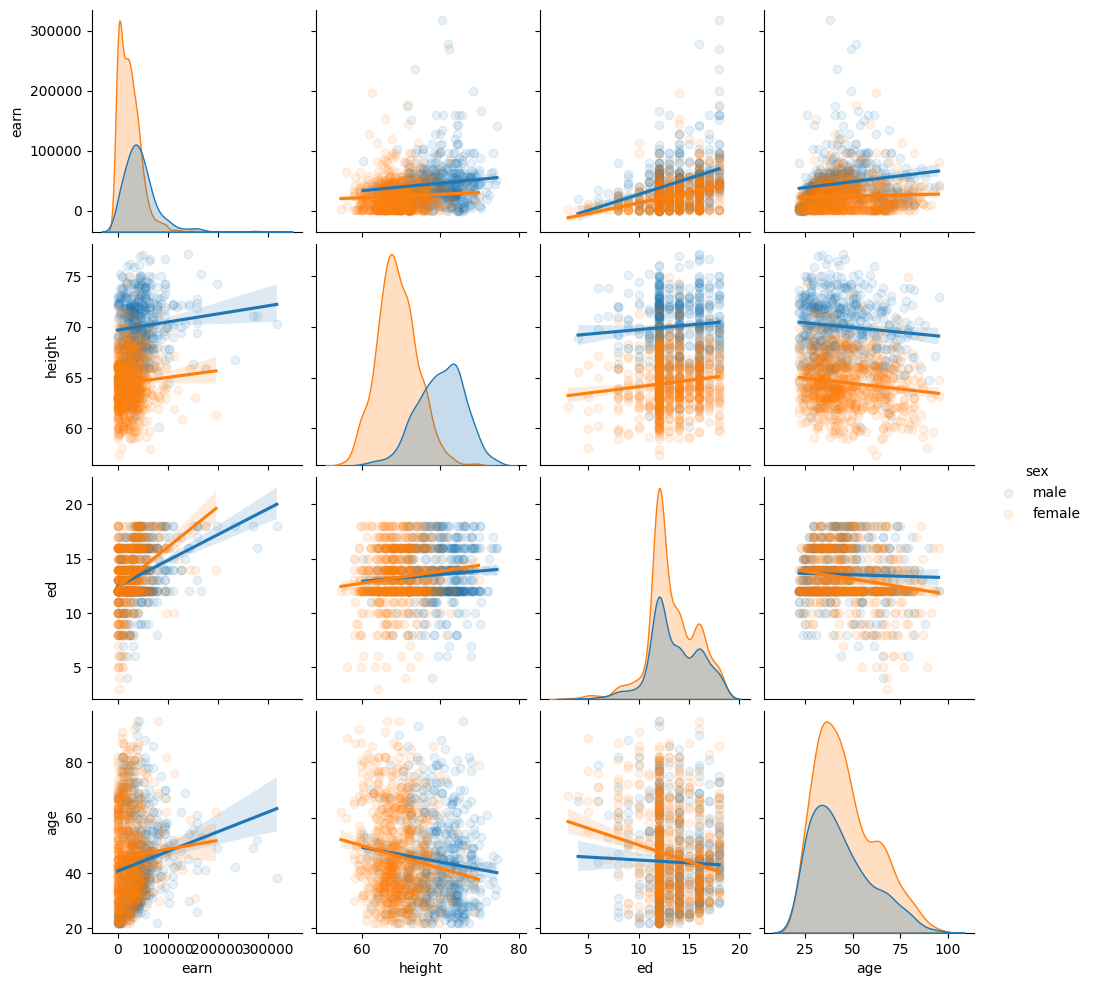

In [18]:
sns.pairplot(
    datos,
    hue='sex',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.1}}
)

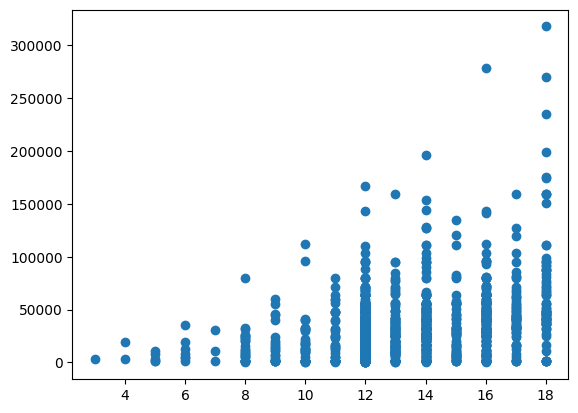

In [21]:
plt.scatter(
    datos['ed'],
    datos['earn']
)

/Users/jealcalat/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


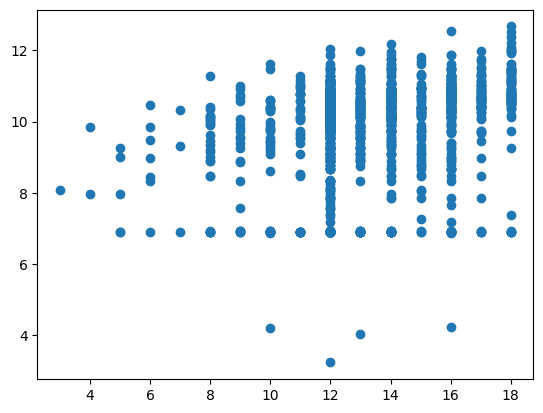

In [22]:
plt.scatter(
    datos['ed'],
    np.log(datos['earn'])
)

In [24]:
# ln(earn) ~ ed + sex + age
# R^2 = 1 - RSS/TSS
datos['log_earn'] = np.log(datos['earn'])
model6 = sm.OLS.from_formula("log_earn ~ ed + age + sex", data=datos)
result6 = model6.fit()
result6.summary()

/Users/jealcalat/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_earn   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     121.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.32e-69
Time:                        19:03:57   Log-Likelihood:                -2233.1
No. Observations:                1368   AIC:                             4474.
Df Residuals:                    1364   BIC:                             4495.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.8497      0.225     30.483      0.000       6.409       7.290
sex[T.male]     0.9929      0.070     14.266      0.000       0.856       1.129
ed              0.1616      0.014     11.624      0.000       0.134       0.189
age             0.0090      0.002      4.159      0.000       0.005       0.013
==============================================================================
Omnibus:                      278.248   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.633
Skew:                          -1.212   Prob(JB):                    9.81e-116
Kurtosis:                       4.848   Cond. No.                         334.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
(result6.aic, result5.aic, result4.aic, result3.aic, result2.aic, result.aic)

(4474.24418569059,
 32074.123690802873,
 32078.21140547137,
 32082.607861590648,
 32260.100591328614,
 32281.117934149417)

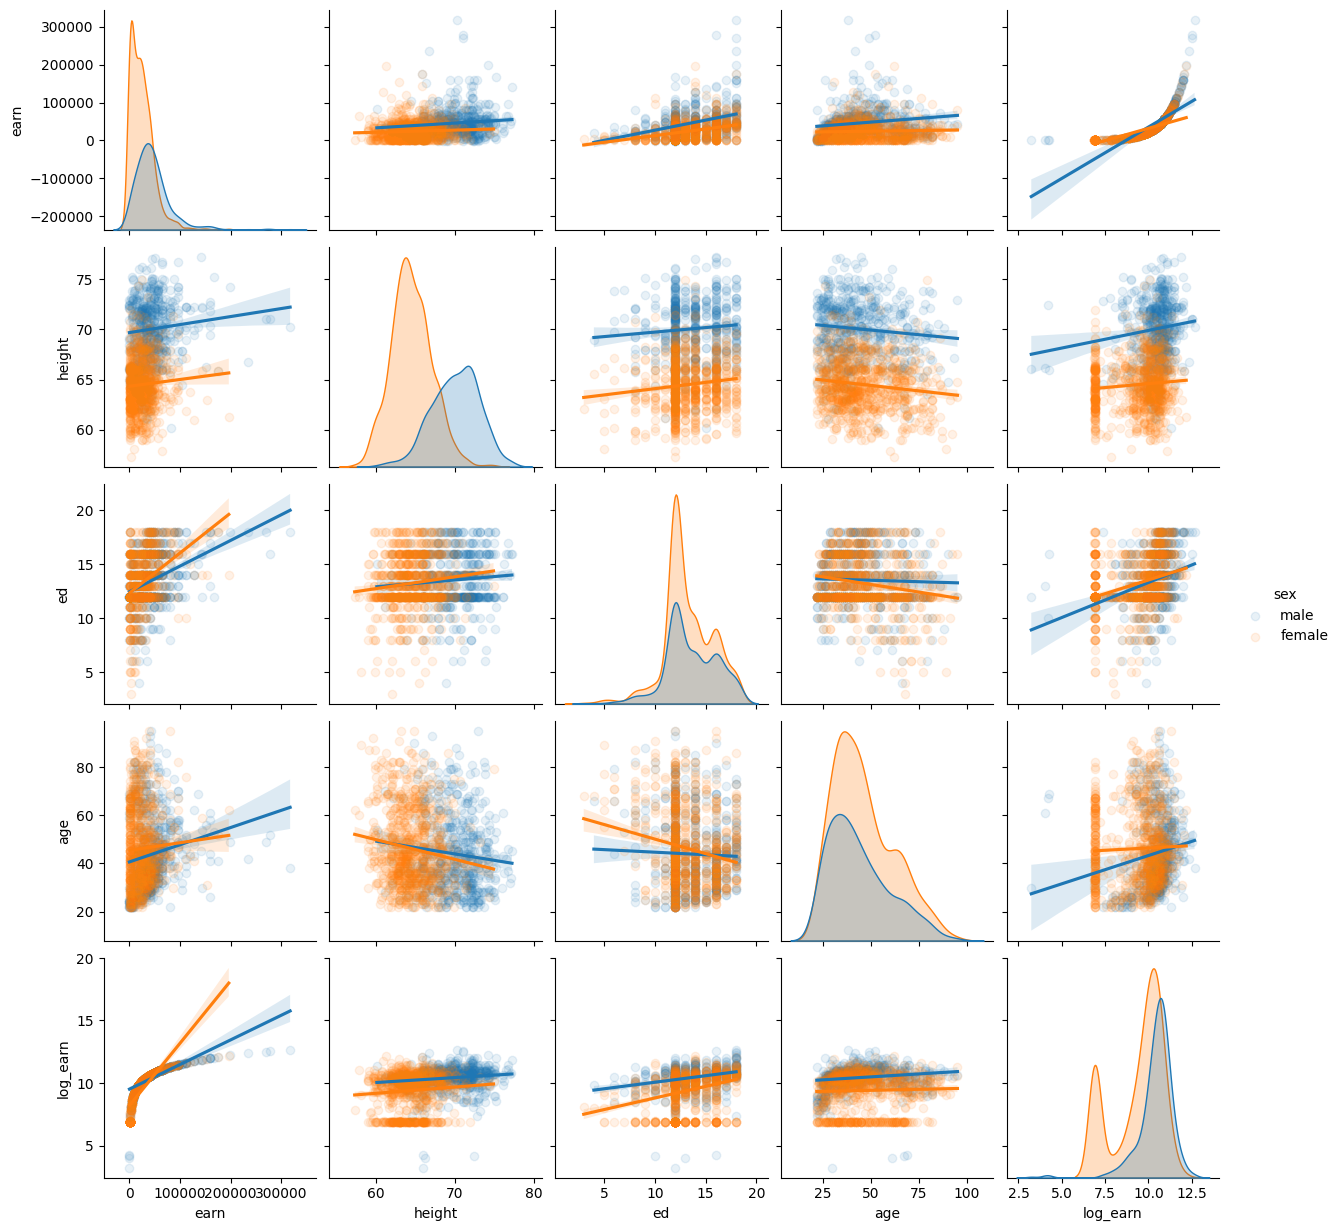

In [30]:
sns.pairplot(
    datos,
    hue='sex',
    kind='reg',
    plot_kws={'scatter_kws': {'alpha': 0.1}}
)

In [37]:
df_new = pd.DataFrame(
    {
        'sex': ['female', 'male'],
        'ed':  [12, 12],
        'age': [35, 35]
    }
)
np.exp(result6.get_prediction(df_new).summary_frame())

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,8977.433960,1.054119,8095.602588,9955.320759,786.987703,102408.614774
1,24230.919785,1.065511,21394.849026,27442.936052,2122.057209,276683.150268


In [32]:
df_new = pd.DataFrame(
    {
        'sex': ['female', 'male'],
        'ed': [12, 12],
        'age': [35, 35]
    }
)
result3.get_prediction(df_new).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,15568.097848,1153.443749,13305.397895,17830.797801,-37902.052062,69038.247758
1,36568.982285,1368.170517,33885.054814,39252.909756,-16920.648364,90058.612934


In [41]:
(24230.919785 - 8977.433960)/8977.433960*100

169.90919557819834

In [39]:
np.exp(0.9929)

2.6990503799073866